In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"D:\DSML\6. Machine Learning\diabetes-1.csv")

# diabetes.csv looks like this
# Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
# 6,148,72,35,0,33.6,0.627,50,1
# 1,85,66,29,0,26.6,0.351,31,0
# 8,183,64,0,0,23.3,0.672,32,1
# 1,89,66,23,94,28.1,0.167,21,0

# print(df.head())
# print(df.describe())
# Display the distribution of outcomes
print(df['Outcome'].value_counts())

Outcome
0    321
1    208
Name: count, dtype: int64


                            Diabetic  Non-Diabetic
Pregnancies                 5.173077      2.557632
Glucose                   150.793269     97.236760
BloodPressure              70.355769     65.890966
SkinThickness              22.855769     19.040498
Insulin                   108.495192     52.177570
BMI                        36.384615     28.456698
DiabetesPedigreeFunction    0.584212      0.393283
Age                        37.716346     27.426791


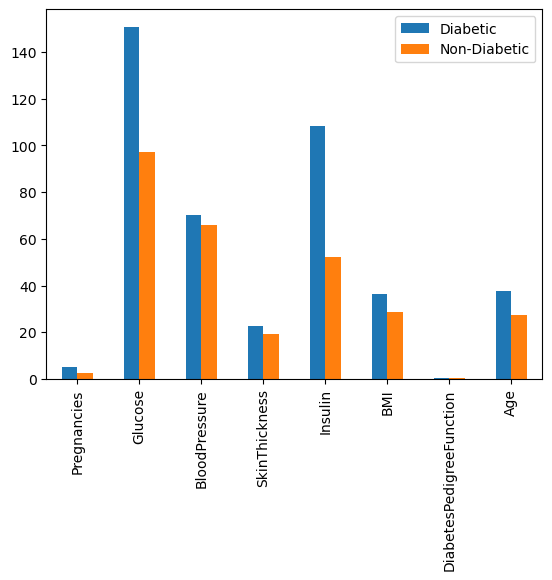

In [3]:
# Calculate the mean values of each feature for diabetic and non-diabetic patients
diabetic_mean = df[df['Outcome'] == 1].mean()
non_diabetic_mean = df[df['Outcome'] == 0].mean()

# Concatenate the mean values into a single DataFrame
mean_comparison = pd.concat([diabetic_mean, non_diabetic_mean], axis=1)
mean_comparison.columns = ['Diabetic', 'Non-Diabetic']

# Remove the 'Outcome' row
mean_comparison = mean_comparison.drop('Outcome')

# Print the mean comparison table
print(mean_comparison)

# Plot the mean comparison table
mean_comparison.plot(kind='bar')
plt.show()

# # Plot the distributions of each feature for diabetic and non-diabetic patients in a single figure with subplots
# fig, axes = plt.subplots(nrows=len(df.columns[:-1]), ncols=1, figsize=(10, 20))
# for i, column in enumerate(df.columns[:-1]):
#     axes[i].hist(df[df['Outcome'] == 1][column], bins=30, alpha=0.5, label='Diabetic')
#     axes[i].hist(df[df['Outcome'] == 0][column], bins=30, alpha=0.5, label='Non-Diabetic')
#     axes[i].legend(loc='upper right')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')
#     axes[i].set_title(f'Distribution of {column} for Diabetic and Non-Diabetic Patients')
# plt.tight_layout()
# plt.show()


Accuracy: 98.87%
Notice the loss function is decreasing with each iteration...


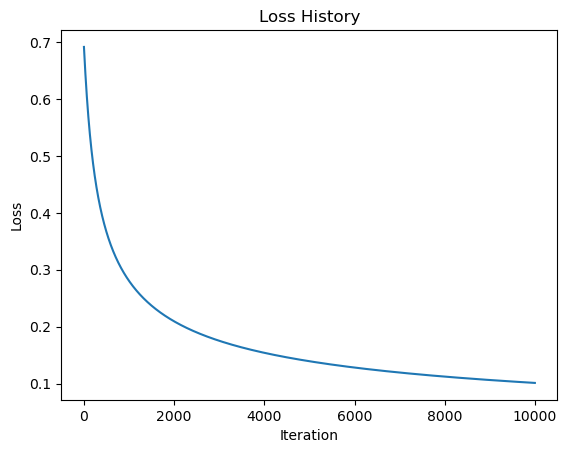

In [5]:
### Using Batch Gradient Descent

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, weights):
    z = np.dot(X, weights)
    h = sigmoid(z)
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Define the gradient descent function
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    loss_history = []
    for i in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
        loss = cost_function(X, y, weights)
        loss_history.append(loss)
    return weights, loss_history

# Define the fit_logistic_regression function
def fit_logistic_regression(X, y, learning_rate, num_iterations):
    weights = np.zeros(X.shape[1])
    weights, loss_history = gradient_descent(X, y, weights, learning_rate, num_iterations)
    return weights, loss_history

# Define the predict_logistic_regression function
def predict_logistic_regression(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z) > 0.5

# Prepare the data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the features
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Fit the model
weights, loss_history = fit_logistic_regression(X_normalized, y, learning_rate=0.005, num_iterations=10000)

# Evaluate the model
y_pred = predict_logistic_regression(X_normalized, weights)
accuracy = (y_pred == y).mean()
# print accuracy as percentage upto 2 decimal places
print(f'Accuracy: {accuracy * 100:.2f}%')


print("Notice the loss function is decreasing with each iteration...")
# Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Accuracy: 99.62%
Notice the likelihood is increasing with each iteration...


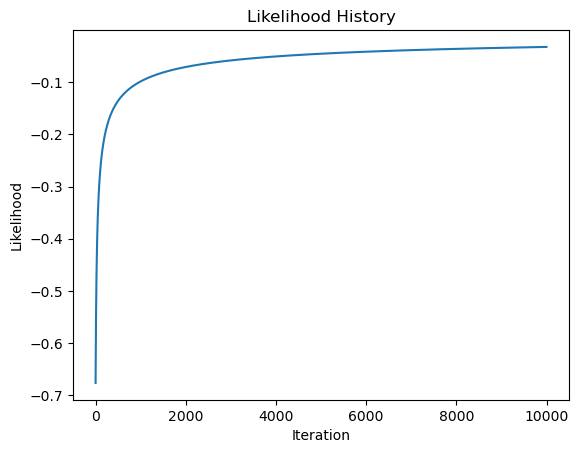

In [7]:
### Now, using stochastic gradient ascent ###
# New cost function - log likelihood
def log_likelihood(X, y, weights):
    z = np.dot(X, weights)
    h = sigmoid(z)
    return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

# New gradient ascent function
def gradient_ascent(X, y, weights, learning_rate, num_iterations):
    likelihood_history = []
    for i in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (y - h))
        weights += learning_rate * gradient
        likelihood = log_likelihood(X, y, weights)
        likelihood_history.append(likelihood)
    return weights, likelihood_history

# Function to fit the logistic regression model using stochastic gradient ascent
def fit_logistic_regression_stochastic(X, y, learning_rate, num_iterations):
    weights = np.zeros(X.shape[1])
    weights, likelihood_history = gradient_ascent(X, y, weights, learning_rate, num_iterations)
    return weights, likelihood_history

# Fit the model
weights, likelihood_history = fit_logistic_regression_stochastic(X_normalized, y, learning_rate=0.0001, num_iterations=10000)

# Evaluate the model
y_pred = predict_logistic_regression(X_normalized, weights)
accuracy = (y_pred == y).mean()
# print accuracy as percentage upto 2 decimal places
print(f'Accuracy: {accuracy * 100:.2f}%')

print("Notice the likelihood is increasing with each iteration...")

# Plot the likelihood history
plt.plot(likelihood_history)
plt.title('Likelihood History')
plt.xlabel('Iteration')
plt.ylabel('Likelihood')
plt.show()

Confusion Matrix:
[[319   2]
 [  0 208]]


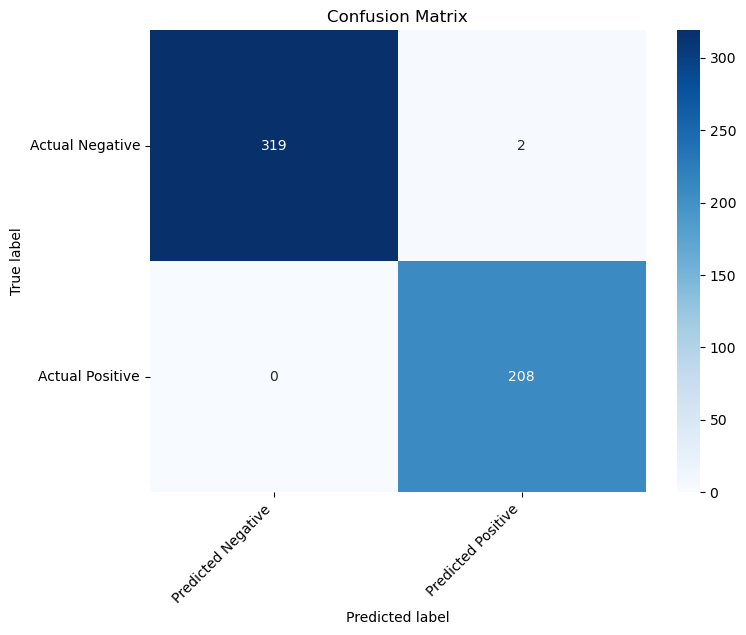

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(cm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [59]:
# print colum names with index
for i, column in enumerate(df.columns[:-1]):
    print(i, column)

0 Pregnancies
1 Glucose
2 BloodPressure
3 SkinThickness
4 Insulin
5 BMI
6 DiabetesPedigreeFunction
7 Age


In [61]:
#### Visualizing the Decision Boundary using feature idx_1 and idx_2
idx_1 = 1 
idx_2 = 4

In [63]:
# Create a meshgrid of points covering the feature space
x_min, x_max = X_normalized[:, idx_1].min() - 1, X_normalized[:, idx_1].max() + 1
y_min, y_max = X_normalized[:, idx_2].min() - 1, X_normalized[:, idx_2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx.shape

(100, 78)

In [65]:
# Flatten the meshgrid points
Z = np.c_[xx.ravel(), yy.ravel()]
xx.ravel().shape

(7800,)

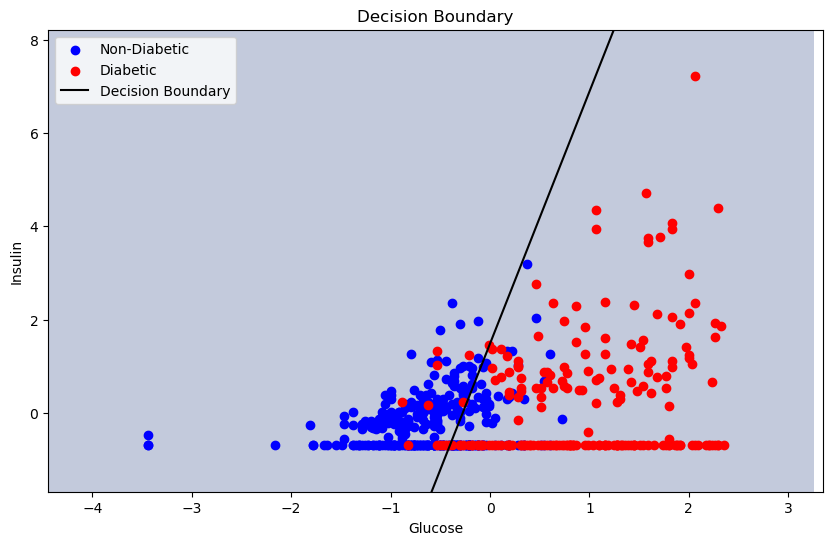

In [67]:
# Normalize the meshgrid points using the mean and standard deviation of the corresponding features in the dataset
Z[:, 0] = (Z[:, 0] - X[:, idx_1].mean()) / X[:, idx_1].std()
Z[:, 1] = (Z[:, 1] - X[:, idx_2].mean()) / X[:, idx_2].std()

# Create a new weights array with only the weights corresponding to Glucose and BMI
weights_subset = weights[[idx_1, idx_2]]

# Predict the class labels for each point in the meshgrid
Z_pred = predict_logistic_regression(Z, weights_subset)
Z_pred = Z_pred.reshape(xx.shape)

# Plot a clear decision boundary at p = 0.5 figure size (10, 6)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_pred, alpha=0.3)
plt.scatter(X_normalized[y == 0, idx_1], X_normalized[y == 0, idx_2], label='Non-Diabetic', color='b')
plt.scatter(X_normalized[y == 1, idx_1], X_normalized[y == 1, idx_2], label='Diabetic', color='r')

# Plotting a clear decision boundary curve
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
plt.plot(x_vals, y_vals, label='Decision Boundary', color='k')

# xlabel the column name at index idx_1 and ylabel the column name at index idx_2
plt.xlabel(df.columns[idx_1])
plt.ylabel(df.columns[idx_2])
plt.title('Decision Boundary')
plt.legend()

# Set the limits of the x-axis to match the range of idx_1 values in the dataset
plt.xlim(X_normalized[:, idx_1].min() - 1, X_normalized[:, idx_1].max() + 1)

# Set the limits of the y-axis to match the range of idx_2 values in the dataset
plt.ylim(X_normalized[:, idx_2].min() - 1, X_normalized[:, idx_2].max() + 1)

plt.show()

                    feature  importance percentage_importance_str
1                   Glucose    7.475622                     41.9%
5                       BMI    3.450472                    19.34%
0               Pregnancies    2.052851                    11.51%
6  DiabetesPedigreeFunction    1.869062                    10.48%
2             BloodPressure    1.382403                     7.75%
7                       Age    1.074875                     6.02%
3             SkinThickness    0.450272                     2.52%
4                   Insulin    0.085575                     0.48%


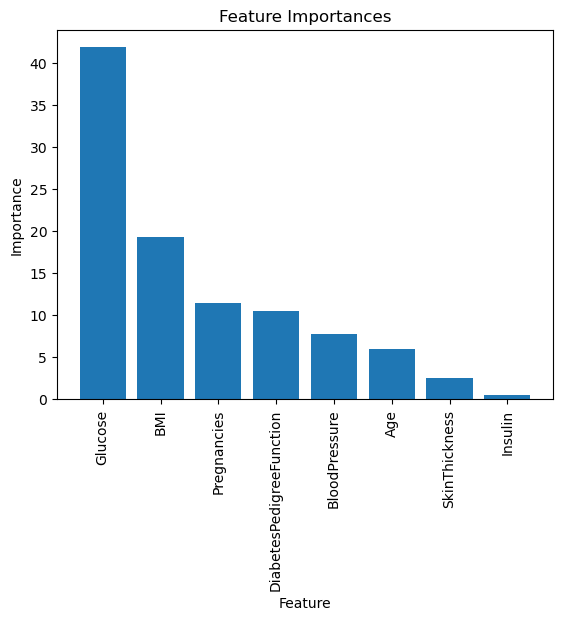

In [69]:
# Get the feature names from the DataFrame
feature_names = df.columns[:-1]

# Calculate the importance of each feature
feature_importances = np.abs(weights)

# Create a DataFrame with the feature names and their importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Calculate the percentage importance
total_importance = importance_df['importance'].sum()
importance_df['percentage_importance'] = (importance_df['importance'] / total_importance) * 100
importance_df['percentage_importance_str'] = importance_df['percentage_importance'].round(2).astype(str) + '%'

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Print the DataFrame (don;t print column percentage_importance)
print(importance_df.drop(columns='percentage_importance'))

# Plot the feature importances
fig, ax = plt.subplots()
ax.bar(importance_df['feature'], importance_df['percentage_importance'])
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
plt.xticks(rotation=90)
plt.show()